In [1]:
from lxml import etree
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
import numpy as np

In [2]:
import os
from fnmatch import fnmatch

root = 'C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/'
pattern = "*.xml"
all_files = []
for path, subdirs, files in os.walk(root):
    for name in files:
        if fnmatch(name, pattern):
            all_files.append(os.path.join(path, name))

In [3]:
def process_file(root):
    text_map = []
    
    for node in root.iter():
        
        if node.tag == 'Reaction':
            
            if "str" in node.attrib:
                term = node.attrib['str']
                value =""
                for node1 in node:
                    if node1.tag == "Normalization":
                        if "meddra_llt" in node1.attrib:
                            value = node1.attrib['meddra_llt']
                        elif "meddra_pt" in node1.attrib:
                            value = node1.attrib["meddra_pt"]
                        break
                if len(value)>0:
                    text_map.append((term,value))
                    
    return text_map
                


In [4]:

termMedraDict  = []

for file1 in all_files:
    print(file1)
    root = etree.parse(file1)
    
    text_map = process_file(root)
    
    #print(len(text_map))
    
    termMedraDict+=text_map
    


C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/ADCETRIS.xml
C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/ADREVIEW.xml
C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/AFINITOR.xml
C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/AMPYRA.xml
C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/AMYVID.xml
C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/APTIOM.xml
C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/ARCAPTA.xml
C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/BELEODAQ.xml
C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/BENLYSTA.xml
C:/Users/nbq4481/Downloads/adis-20190715T114343Z-001/adis/public_dataset_ADR/train_xml/BEPREVE.xml
C:/Users

In [5]:
len(termMedraDict)

6991

In [6]:
import pandas as pd
df1 = pd.read_excel("ProductData.xlsx")

In [7]:
df = df1[~df1['MedraLLT'].isnull()]

In [8]:
for i, row in df.iterrows():
    
    term = row['PrimarySourceReport']
    #re.sub('/|-', ' ', .lower())
    value = row['MedraLLT']
    termMedraDict.append((term,value))

In [9]:
len(termMedraDict)

117453

In [19]:
len(set([row[1] for row in termMedraDict]))

6838

In [18]:
len([row for row in termMedraDict if row[0].lower()==row[1].lower()])

3882

In [15]:
termMedraDict = list(set(termMedraDict))

In [25]:
import random
data = []

for row in termMedraDict: 
    data.append(row+(1,))
    
    ind = random.sample(range(0, len(termMedraDict)), 8)
    
    j =0
    for i in ind:
        if row[1]!=termMedraDict[i][1]:
            data.append((row[0], termMedraDict[i][1] ,0))
            j+=1
        if j==5:
            break
            

In [26]:
len(data)

124488

In [30]:
indices1 = np.arange(len(data))
np.random.shuffle(indices1)
data = np.asanyarray(data)[indices1]

In [ ]:
all_meddra_terms = list(set([row[1] for row in data]))

In [39]:
import pandas as pd

In [40]:
data = pd.DataFrame(data = data, columns = ['sen1','sen2','label'])

In [35]:
len(all_meddra_terms)

6838

In [37]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nbq4481\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [48]:
stop_words = set(stopwords.words('english')) 

In [75]:
def text_to_word_list(text):
    ''' Pre process and convert texts to a list of words '''
    text = str(text)
    text = text.lower()

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = word_tokenize(text)
    
    text = [w for w in text if w not in stop_words]
    text = [w for w in text if len(w)>1]
    #text = [w for w in text if w.isalpha()]

    return text

In [76]:
data['tokens1'] = data['sen1'].apply(text_to_word_list)
data['tokens2'] = data['sen2'].apply(text_to_word_list)

In [77]:
word_count = Counter([x for y in data['tokens1'].values+data['tokens2'].values for x in y])

In [78]:
wordDict = {w: i + 1 for i, w in enumerate(word_count.keys())}

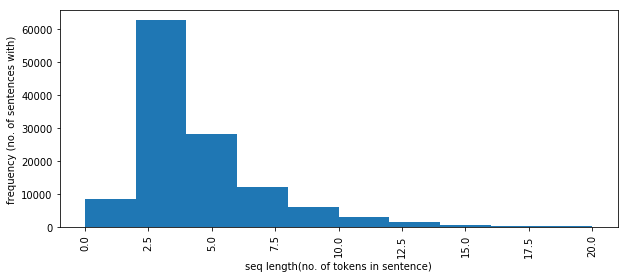

In [282]:
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

seq_len = [len(row) for row in data['tokens1'].values]

plt.figure(figsize=(10,4))
plt.hist(seq_len, bins=10, range=[0, 20],   label='train')
plt.xticks(rotation='vertical')
plt.xlabel("seq length(no. of tokens in sentence)")
plt.ylabel("frequency (no. of sentences with)")
plt.show()

In [290]:
sum([1 for a in seq_len if a>10]) , len(seq_len)

(4830, 124488)

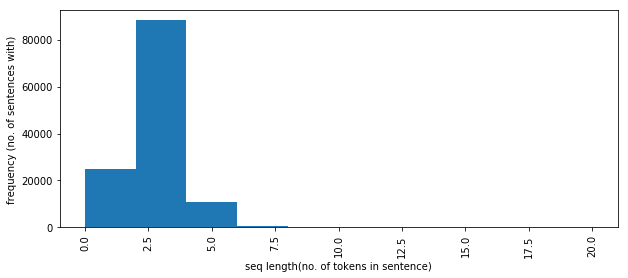

In [80]:
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

seq_len = [len(row) for row in data['tokens2'].values]

plt.figure(figsize=(10,4))
plt.hist(seq_len, bins=10, range=[0, 20],   label='train')
plt.xticks(rotation='vertical')
plt.xlabel("seq length(no. of tokens in sentence)")
plt.ylabel("frequency (no. of sentences with)")
plt.show()

In [291]:
max_seq_len = 10

In [292]:
from keras.preprocessing.sequence import pad_sequences

X1 = [[wordDict[w] for w in s ] for s in data['tokens1'].values]
X2 = [[wordDict[w] for w in s ] for s in data['tokens2'].values]

X1 = pad_sequences(maxlen=max_seq_len, sequences=X1, padding="post", value= 0, truncating="pre")
X2 = pad_sequences(maxlen=max_seq_len, sequences=X2, padding="post", value= 0,truncating="pre")


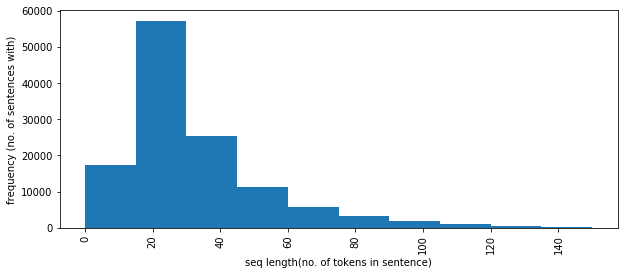

In [298]:
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

seq_len = [len("".join(row)) for row in data['tokens1'].values]

plt.figure(figsize=(10,4))
plt.hist(seq_len, bins=10, range=[0, 150],   label='train')
plt.xticks(rotation='vertical')
plt.xlabel("seq length(no. of tokens in sentence)")
plt.ylabel("frequency (no. of sentences with)")
plt.show()

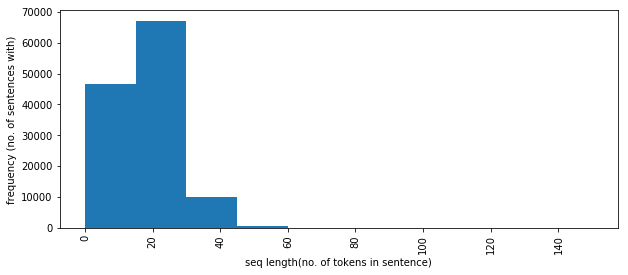

In [297]:
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

seq_len = [len("".join(row)) for row in data['tokens2'].values]

plt.figure(figsize=(10,4))
plt.hist(seq_len, bins=10, range=[0, 150],   label='train')
plt.xticks(rotation='vertical')
plt.xlabel("seq length(no. of tokens in sentence)")
plt.ylabel("frequency (no. of sentences with)")
plt.show()

In [299]:
max_len_char = 70

In [300]:
chars = set([w_i for w in [x for y in data['tokens1'].values+data['tokens2'].values for x in y] for w_i in w if w_i.isalpha()])
n_chars = len(chars)
print(n_chars)

26


In [301]:
char2idx = {c: i + 1 for i, c in enumerate(chars)}

In [302]:
from keras.preprocessing.sequence import pad_sequences

Z1 = [[char2idx[w] for w in "".join(s) if w in chars] for s in data['tokens1'].values]
Z2 = [[char2idx[w] for w in "".join(s) if w in chars] for s in data['tokens2'].values]

Z1 = pad_sequences(maxlen=max_len_char, sequences=Z1, padding="post", value= 0, truncating="pre")
Z2 = pad_sequences(maxlen=max_len_char, sequences=Z2, padding="post", value= 0,truncating="pre")


In [306]:
Y = np.asarray([int(a) for a in data['label'].values])

In [309]:
import gensim

# Load pre-trained Word2Vec model.
pretrained_ebd_model2 = gensim.models.KeyedVectors.load_word2vec_format("C:/Users/nbq4481/Downloads/pubmed2018_w2v_200D/pubmed2018_w2v_200D.bin",binary=True)

C:\Anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [310]:
abw_list = []
EMBEDDING_DIM = 200
num_words = len(wordDict) 
embedding_matrix = np.random.uniform(-0.25, 0.25,(num_words+1, EMBEDDING_DIM))
abw = 0 
for word, i in wordDict.items():
    if word in pretrained_ebd_model2:
        embedding_matrix[i] = pretrained_ebd_model2[word]
    else:
        abw+=1
        abw_list.append(word)
        pass
        #print(word)

In [311]:
abw

188

In [312]:
pretrained_ebd_model2  =None

In [313]:
split_ind = int(len(data)*0.90)

In [314]:
X1train = X1[:split_ind]
X2train = X2[:split_ind]
Z1train = Z1[:split_ind]
Z2train = Z2[:split_ind]

X1val = X1[split_ind:]
X2val = X2[split_ind:]
Z1val = Z1[split_ind:]
Z2val = Z2[split_ind:]


ytrain = Y[:split_ind]
yval = Y[split_ind:]

In [315]:
X1train.shape, X1val.shape

((112039, 10), (12449, 10))

In [316]:
Counter(yval), Counter(ytrain)

(Counter({0: 10390, 1: 2059}), Counter({0: 93350, 1: 18689}))

In [317]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, BatchNormalization, \
Convolution1D, MaxPooling1D, Flatten, GlobalAveragePooling1D, GlobalMaxPooling1D, Subtract
from keras_contrib.layers import CRF
from keras.callbacks import EarlyStopping
from keras.layers import concatenate

In [318]:

char_EMBEDDING_DIM = 4

char_emb_layer = Embedding(input_dim=n_chars+1 , output_dim= char_EMBEDDING_DIM,
                               input_length=max_len_char)

def get_conv_graph1(filter_sizes,no_filters,ip_shape, pool_len=2):
    graph_in = Input(shape=ip_shape)
    convs = []              
    for fsz in filter_sizes:
        conv = Convolution1D(filters=no_filters,        
                              kernel_size=fsz,
                                 padding="same",
                                 activation='relu',)(graph_in)
        
        pool = MaxPooling1D(pool_length=pool_len)(conv)    
        convs.append(pool)

    if len(filter_sizes) > 1:
        out = concatenate(convs)
    else:
        out = convs[0]
    
    graph = Model(input=graph_in, output=out)
    return graph

def Char_cnn(max_len_char, char_EMBEDDING_DIM):
    
    input_data = Input(shape=(max_len_char,),)

    emb_ip = char_emb_layer(input_data)
    
    graph = get_conv_graph1([2,3,4,5],15,(max_len_char,char_EMBEDDING_DIM))
    
    conv1 = graph(emb_ip)
    
    x = Dropout(0.1)(conv1)
    
    graph = get_conv_graph1([2,3],40,(int(conv1.shape[1]),int(conv1.shape[2])))
    
    conv1 = graph(x)    
    
    x = Dropout(0.2)(conv1)
    
    #x = BatchNormalization()(x)
    
    #x = LSTM(30, dropout=0.2)(x)
    
    
    graph = get_conv_graph1([2,3],45,(int(conv1.shape[1]),int(conv1.shape[2])))
    
    conv1 = graph(x) 
    
    x = Dropout(0.2)(conv1)
    
    graph = get_conv_graph1([2,3],50,(int(conv1.shape[1]),int(conv1.shape[2])))
    
    conv1 = graph(x) 
    
    flatten = Flatten()(conv1)
    
    out = Dense(100,activation='relu')(flatten)
    
    model = Model(input=input_data, output=out)

    return model

In [319]:
Embedding_dim = 200
embeding_layer = Embedding(input_dim= len(wordDict)+1, output_dim= Embedding_dim, weights = [embedding_matrix],
                  input_length=max_seq_len, mask_zero=True)

def create_model(embeding_layer, max_len):
    
    left_input = Input(shape=(max_len,))
    right_input = Input(shape=(max_len,))
    left_char_in = Input(shape=(max_len_char,))
    right_char_in = Input(shape=(max_len_char,))

    left_emb_word = embeding_layer(left_input)
    right_emb_word = embeding_layer(right_input)
    
    char_cnn_model = Char_cnn(max_len_char, char_EMBEDDING_DIM)
    
    left_char_emb = char_cnn_model(left_char_in)
    right_char_emb = char_cnn_model(right_char_in)
    
    lstm1 =  Bidirectional(LSTM(units=100))
    
    left_lstm = lstm1(left_emb_word)
    right_lstm = lstm1(right_emb_word)

    
    left_conc = concatenate([left_lstm, left_char_emb])
    right_conc = concatenate([right_lstm, right_char_emb])

    norm_layer = BatchNormalization()
    left_norm = norm_layer(left_conc)
    right_norm = norm_layer(right_conc)
    
    subtracted = Subtract()([left_norm, right_norm])
    
#     concat =   concatenate([left_norm,right_norm])

#     dense = Dense(300,  activation="relu")(concat)
#     dropout = Dropout(0.2)(dense)
#     norm  = BatchNormalization()(dropout)

#     dense = Dense(300,  activation="relu")(norm)
#     dropout = Dropout(0.2)(dense)
#     norm  = BatchNormalization()(dropout)
    
#     dense = Dense(300,  activation="relu")(norm)
#     dropout = Dropout(0.2)(dense)
#     norm  = BatchNormalization()(dropout)
    
#     dense = Dense(300,  activation="relu")(norm)
#     dropout = Dropout(0.2)(dense)
#     norm  = BatchNormalization()(dense)
    
#     dense = Dense(300,  activation="relu")(norm)
#     dropout = Dropout(0.2)(dense)
#     norm  = BatchNormalization()(dense)

#     concat = concatenate([norm,subtracted])
#     norm  = BatchNormalization()(concat)

    norm  = BatchNormalization()(subtracted)
    
    dense = Dense(100,  activation="relu")(norm)
    dropout = Dropout(0.2)(dense)
    
    out = Dense(1, activation='sigmoid')(dropout)
    
    model = Model(inputs=[left_input,right_input,left_char_in,right_char_in], outputs=out)
    
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    return model
    

In [320]:
model = create_model(embeding_layer, max_seq_len)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  app.launch_new_instance()
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [321]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_106 (InputLayer)          (None, 10)           0                                            
__________________________________________________________________________________________________
input_107 (InputLayer)          (None, 10)           0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 10, 200)      1862000     input_106[0][0]                  
                                                                 input_107[0][0]                  
__________________________________________________________________________________________________
input_108 (InputLayer)          (None, 70)           0                                            
__________

In [323]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

file_path= "weights_base.best.hdf5"

checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early = EarlyStopping(monitor="val_acc", mode="max", patience=3)

callbacks_list = [checkpoint, early] 

In [324]:
indices = np.arange(len(X1train))
np.random.shuffle(indices)
model.fit([X1train[indices],X2train[indices],Z1train[indices],Z2train[indices]], ytrain[indices],
          batch_size=32, epochs=3, callbacks=callbacks_list, 
          validation_data=([X1val,X2val,Z1val,Z2val],yval),verbose=1, shuffle=True)

Train on 112039 samples, validate on 12449 samples
Epoch 1/3
112039/112039 [==============================] - 1174s 10ms/step - loss: 0.1327 - acc: 0.9479 - val_loss: 0.6897 - val_acc: 0.8137

Epoch 00001: val_acc improved from -inf to 0.81372, saving model to weights_base.best.hdf5
Epoch 2/3
112039/112039 [==============================] - 1171s 10ms/step - loss: 0.0788 - acc: 0.9725 - val_loss: 0.0792 - val_acc: 0.9730

Epoch 00002: val_acc improved from 0.81372 to 0.97301, saving model to weights_base.best.hdf5
Epoch 3/3
112039/112039 [==============================] - 1155s 10ms/step - loss: 0.0643 - acc: 0.9785 - val_loss: 0.0816 - val_acc: 0.9747

Epoch 00003: val_acc improved from 0.97301 to 0.97470, saving model to weights_base.best.hdf5


In [325]:
indices = np.arange(len(X1train))
np.random.shuffle(indices)
model.fit([X1train[indices],X2train[indices],Z1train[indices],Z2train[indices]], ytrain[indices],
          batch_size=32, epochs=3, callbacks=callbacks_list, 
          validation_data=([X1val,X2val,Z1val,Z2val],yval),verbose=1, shuffle=True)

Train on 112039 samples, validate on 12449 samples
Epoch 1/3
112039/112039 [==============================] - 948s 8ms/step - loss: 0.0546 - acc: 0.9820 - val_loss: 0.0883 - val_acc: 0.9761

Epoch 00001: val_acc improved from 0.97470 to 0.97606, saving model to weights_base.best.hdf5
Epoch 2/3
112039/112039 [==============================] - 941s 8ms/step - loss: 0.0492 - acc: 0.9843 - val_loss: 0.1019 - val_acc: 0.9717

Epoch 00002: val_acc did not improve from 0.97606
Epoch 3/3
112039/112039 [==============================] - 1035s 9ms/step - loss: 0.0448 - acc: 0.9859 - val_loss: 0.1000 - val_acc: 0.9732

Epoch 00003: val_acc did not improve from 0.97606


In [270]:
indices = np.arange(len(X1train))
np.random.shuffle(indices)
model.fit([X1train[indices],X2train[indices],Z1train[indices],Z2train[indices]], ytrain[indices],
          batch_size=32, epochs=1, callbacks=callbacks_list, 
          validation_data=([X1val,X2val,Z1val,Z2val],yval),verbose=1, shuffle=True)

Train on 112039 samples, validate on 12449 samples
Epoch 1/1
112039/112039 [==============================] - 1329s 12ms/step - loss: 0.0441 - acc: 0.9865 - val_loss: 0.0899 - val_acc: 0.9749

Epoch 00001: val_acc did not improve from 0.97574


In [326]:
model.load_weights("weights_base.best.hdf5")

In [334]:
model.save("MeddraTermPrediction/model3")

In [253]:
from keras.models import load_model

model = load_model('MeddraTermPrediction/model1')

In [327]:
prediction = model.predict([X1val,X2val,Z1val,Z2val])

In [328]:
prediction1 = np.asarray([1 if a>0.5 else 0 for a in prediction])

In [329]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [256]:
accuracy_score(prediction1, [int(a) for a in yval.values])

0.9720459474656599

In [331]:
print(classification_report(prediction1, yval))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10374
           1       0.93      0.92      0.93      2075

   micro avg       0.98      0.98      0.98     12449
   macro avg       0.96      0.96      0.96     12449
weighted avg       0.98      0.98      0.98     12449



In [249]:
print(classification_report(prediction1, [int(a) for a in yval.values]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     10408
           1       0.91      0.92      0.92      2041

   micro avg       0.97      0.97      0.97     12449
   macro avg       0.95      0.95      0.95     12449
weighted avg       0.97      0.97      0.97     12449



In [265]:
print(classification_report(prediction1, [int(a) for a in yval.values]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     10304
           1       0.95      0.91      0.93      2145

   micro avg       0.98      0.98      0.98     12449
   macro avg       0.96      0.95      0.96     12449
weighted avg       0.98      0.98      0.98     12449



In [333]:
print(confusion_matrix(prediction1,yval))

[[10233   141]
 [  157  1918]]


In [235]:
print(confusion_matrix(prediction1, [int(a) for a in yval.values]))

[[10225   183]
 [  165  1876]]


In [266]:
print(confusion_matrix(prediction1, [int(a) for a in yval.values]))

[[10196   108]
 [  194  1951]]


In [344]:
data.iloc[indices1[split_ind:][np.asanyarray(prediction1) != np.asarray(yval)]][['sen1','sen2','label']]

,sen1,sen2,label
107156,Full dose of capecitabine due to miscommunication,Transaminases increased,0
34706,Macular cytomegalovirus retinitis in the left eye,SIADH,0
91548,Ivermectin-induced warfarin toxicity,Meningoencephalitis bacterial,0
73147,Bupropion overdose for suicide,Drug clearance decreased,0
35412,Disease progression on capecitabine-gemcitabin...,Delusions,0
9141,detumescence,Inability to maintain erection,1
116429,Hemorrhagic necrosis/ haemorrhage into the ori...,Candidaemia,0
42235,Interstitial pneumonitis,Drug exposure during pregnancy,0
63612,Grade 1 elevated AST level,Hypermagnesaemia,0
49404,Fungal infection,Fungal infection,1
